Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!


# Import 

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Get the data

we will work on ecommerce customers data.which contains information of Email,Address,time on app,time on mobile,avg.session length,length of membership.

In [2]:
ct=pd.read_csv('Desktop/Ecommerce Customers')

In [3]:
ct.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
ct.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
ct.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Data Analysis

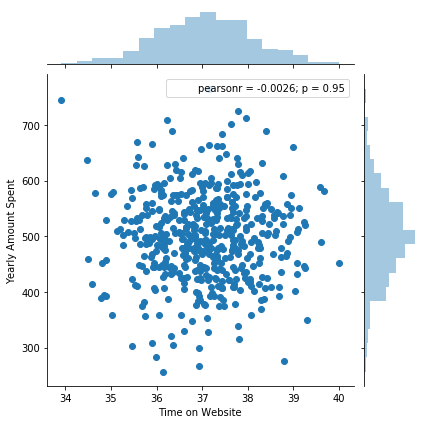

In [7]:
sns.jointplot(data=ct,x='Time on Website',y='Yearly Amount Spent')

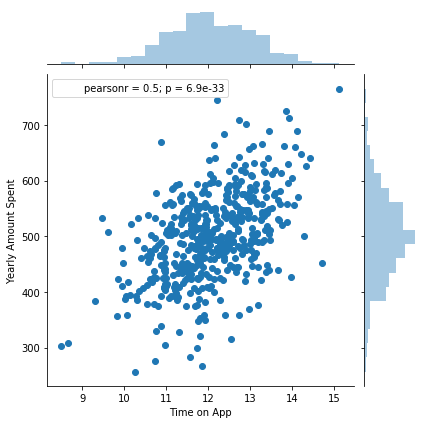

In [8]:
sns.jointplot(data=ct,x='Time on App',y='Yearly Amount Spent')

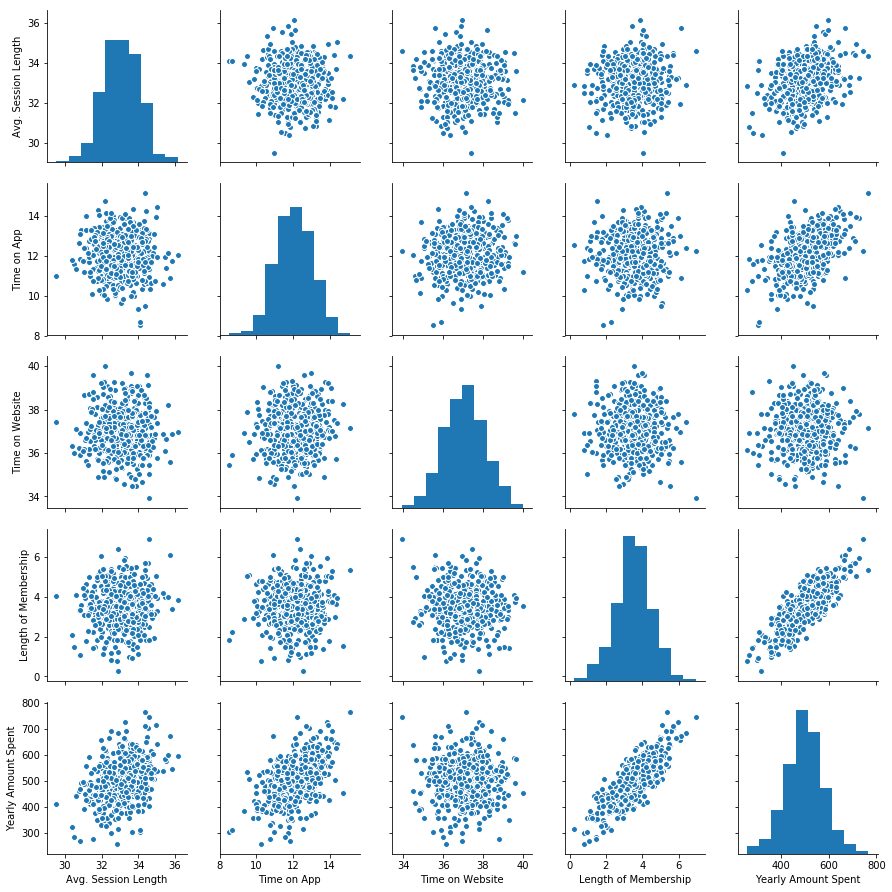

In [9]:
sns.pairplot(ct)

Based on this plot length of membership has a most correlated with year amount spent

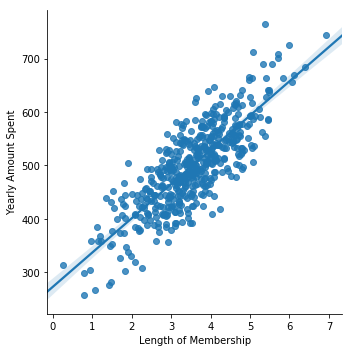

In [10]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=ct)

In [11]:
ct.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


# Traning and Testing Data

In [12]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X=ct[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [14]:
Y=ct['Yearly Amount Spent']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [15]:
from sklearn.linear_model import LinearRegression

# Fit a model 



In [16]:
c=LinearRegression()
c.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(c.intercept_)

-1053.778029341152


In [18]:
c.coef_

array([25.64117546, 38.90628807,  0.52792715, 61.493753  ])

In [19]:
cd=pd.DataFrame(c.coef_,X_train.columns,columns=['coeff'])

In [20]:
cd

,coeff
Avg. Session Length,25.641175
Time on App,38.906288
Time on Website,0.527927
Length of Membership,61.493753


# Prediction

In [21]:
p=c.predict(X_test)

In [22]:
p

array([491.58663218, 583.26813888, 608.7609717 , 450.96792029,
       558.16394924, 408.483926  , 451.90316337, 523.90000507,
       526.14266273, 472.41982698, 460.98737217, 457.23455631,
       504.08093215, 380.46977646, 519.68541294, 457.59149462,
       365.7608055 , 715.99455349, 652.19291135, 515.49157721,
       519.63822361, 439.11298711, 662.9809175 , 491.666669  ,
       283.66846542, 581.47358962, 472.1075978 , 469.2917513 ,
       562.89690675, 402.01119828, 384.40244624, 492.85601413,
       381.68555086, 461.45707559, 543.579504  , 491.48017512,
       553.58127997, 482.65328012, 495.96206154, 433.92352549,
       505.80152658, 523.46956488, 417.50565518, 532.14084334,
       478.6736    , 398.92549726, 558.4737311 , 549.07777658,
       458.09575772, 503.46308421, 525.54083035, 430.55537638,
       408.96774536, 484.74978453, 634.55340089, 498.50417039,
       417.29119643, 546.04012942, 390.09952173, 580.99693454,
       448.6552884 , 443.74503771, 478.97989703, 481.43

In [23]:
print(Y_test)

235    501.209173
256    574.654843
410    608.271817
171    439.891280
213    558.427257
68     408.620188
142    463.923513
215    529.056663
250    523.633935
81     462.897636
14     470.452733
227    461.920877
354    508.771907
175    373.885724
370    521.240780
484    462.656519
161    357.591439
205    712.396327
247    647.619456
145    505.771140
340    501.122492
90     449.070319
153    657.019924
123    495.175950
303    266.086341
315    584.105885
174    465.176623
282    475.263424
47     563.672873
102    420.737673
          ...    
387    458.781132
209    468.668466
232    630.422763
324    559.199048
496    529.049004
116    479.231093
21     419.938775
429    502.132789
98     507.390062
287    432.472061
67     469.310861
413    493.181261
32     588.712606
15     461.780742
95     543.340166
467    436.580740
405    508.735741
13     573.415867
61     507.212569
60     616.851523
85     536.771899
103    492.105052
234    493.180216
127    468.445737
226    547

Text(0,0.5,'prediction values')

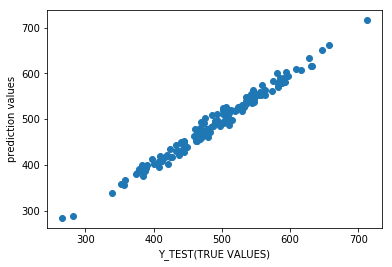

In [24]:
plt.scatter(Y_test,p)
plt.xlabel('Y_TEST(TRUE VALUES)')
plt.ylabel('prediction values')

Let's quickly explore the residuals to make sure everything was okay with our data.

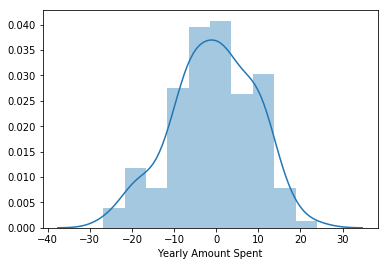

In [25]:
sns.distplot((Y_test-p))

# Conculsion


In [26]:
cd

,coeff
Avg. Session Length,25.641175
Time on App,38.906288
Time on Website,0.527927
Length of Membership,61.493753



firstly,From above coeff we can say that  ,one unit of time spent on website increases there  will be minimal  increase in the amount spent.if one unit of time spent on app increase they may be increase in amount spent.

second,if one unit of length of membership grows  then the amount  spent increases